# Notes for Think Stats by Allen B. Downey

In [1]:
from typing import List

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
% matplotlib inline

## Chapter 01

### Glossary

- anecdotal evidence - is an evidence based on personal experience rather than based on well-designed and scrupulous study. 
- cross-sectional study - is a study that colllects data about a population at a particular point in time.
- longitudinal study - is a study that follow the same group repeatedly and collects the data over time.

## Chapter 02

#### Mean - central tendency

$$ \overline{x} = \frac{1}{n} \sum_i x_i \ $$

In [2]:
sample = [1, 3, 5, 6]

In [3]:
np.mean(sample)

3.75

In [4]:
pd.DataFrame(sample).mean()

0    3.75
dtype: float64

#### Variance

$$ S^2 = \frac{1}{n} \sum_i (x_i - \overline{x})^2 $$

In [5]:
np.var(sample)

3.6875

In [6]:
# Warning! Pandas variance by default is normalized by N-1!
# That can be changed by using ddof(delta degrees of freedom) = 0
pd.DataFrame(sample).var(ddof = 0)

0    3.6875
dtype: float64

#### Standard Deviation

$$ \sigma = \sqrt{S^{2}} $$ 

In [7]:
np.std(sample)

1.920286436967152

In [8]:
# Warning! Pandas std is calculated with variance by N-1!
# That can be changed by using ddof(delta degrees of freedom) = 0
pd.DataFrame(sample).std(ddof = 0)

0    1.920286
dtype: float64

#### Effect size - Cohen'd

Having groups **G1** and **G2**, with number of elements given as **N1** and **N2**, the effect size is given as:

$$ Cohen'd = \frac{\overline{G1} - \overline{G2}}{\sqrt{(\sigma (G1) \cdot (N1-1) + \sigma (G2) \cdot (N2-1)) / ((N1-1) + (N2-1))}} $$

In [9]:
def effect_size(g1: pd.DataFrame, g2: pd.DataFrame) -> float:
    diff = g1.mean() - g2.mean()
    var_g1, var_g2 = g1.var(ddof=1), g2.var(ddof=1)
    n1, n2 = len(g1), len(g2)
    
    pooled_var = (var_g1 * (n1 - 1) + var_g2 * (n2 - 1)) / ((n1 - 1) + (n2 - 1))
    cohen_d = diff / np.sqrt(pooled_var)
    return cohen_d

It is calculated with delta degree of freedom = 1!

In [10]:
effect_size(pd.DataFrame([1, 2, 3, 4]), pd.DataFrame([3, 3, 1, 2]))

0    0.219971
dtype: float64

## Chapter 03

#### Probability Mass Function

Probability mass function maps each value to its probability.
Probability of a group always adds to one.

In [11]:
s = pd.Series([1, 2, 3, 4, 2])

In [12]:
def pmf(series: pd.Series) -> pd.Series:
    return series.value_counts().sort_index() / series.count()

In [13]:
pmf(s)

1    0.2
2    0.4
3    0.2
4    0.2
dtype: float64

#### DataFrame Indexing

In [14]:
array = np.random.randn(4, 2)
array

array([[ 2.81279977, -0.27419515],
       [-0.34288274, -1.49253588],
       [-0.39301941,  0.47313637],
       [-0.38158405,  1.62514084]])

In [15]:
df = pd.DataFrame(array)
df

,0,1
0,2.812800,-0.274195
1,-0.342883,-1.492536
2,-0.393019,0.473136
3,-0.381584,1.625141


In [16]:
columns = ['A', 'B']
df = pd.DataFrame(data=array,
                  columns=columns)
df

,A,B
0,2.812800,-0.274195
1,-0.342883,-1.492536
2,-0.393019,0.473136
3,-0.381584,1.625141


In [17]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(data=array,
                  columns=columns,
                  index=index)
df

,A,B
a,2.812800,-0.274195
b,-0.342883,-1.492536
c,-0.393019,0.473136
d,-0.381584,1.625141


In [18]:
df['A']

a    2.812800
b   -0.342883
c   -0.393019
d   -0.381584
Name: A, dtype: float64

In [19]:
df.loc['a']

A    2.812800
B   -0.274195
Name: a, dtype: float64

In [20]:
df.iloc[0]

A    2.812800
B   -0.274195
Name: a, dtype: float64

In [21]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,2.812800,-0.274195
c,-0.393019,0.473136


In [22]:
df['a':'c']

,A,B
a,2.812800,-0.274195
b,-0.342883,-1.492536
c,-0.393019,0.473136


In [23]:
df[0:2]

,A,B
a,2.812800,-0.274195
b,-0.342883,-1.492536


In [24]:
df[:2]

,A,B
a,2.812800,-0.274195
b,-0.342883,-1.492536


In [25]:
df['A'].loc['a']

2.8127997717756927

## Chapter 04

#### Percentile Rank

Percentile rank is a metric that presents how big is the subset of the data that the values in the subset
are equal or below any given value.

In [26]:
# Data
a = [1, 2, 3, 3, 4, 5]

In [27]:
stats.percentileofscore(a=a, score=2.5)

33.33333333333333

In [28]:
stats.percentileofscore(a=a, score=2)

33.33333333333333

In [29]:
stats.percentileofscore(a=a, score=3)

58.333333333333336

#### Percentile

Percentile is the opposite operation to percentile rank - it maps a percentile rank to a value.

In [30]:
np.percentile(a=a, q=50)

3.0

In [31]:
np.percentile(a=a, q=70)

3.5

In [32]:
# Pandas uses quantiles with different interpolation methods.
pd.DataFrame(data=a).quantile(q=0.5)

0    3.0
Name: 0.5, dtype: float64

#### Cumulative Distribution Function

Cumulative Distribution Function is the function that maps from a value to its percentile rank.

In [33]:
series = pd.Series(np.random.randn(25))

In [34]:
series.head()

0    0.016472
1    0.036919
2   -1.138977
3   -0.967890
4    0.180948
dtype: float64

In [35]:
cdf = series.value_counts().sort_index().cumsum()

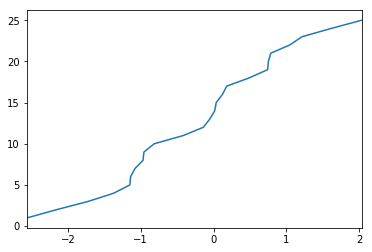

In [36]:
cdf.plot()

It can be plotted using .hist()

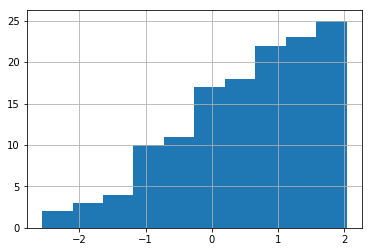

In [37]:
series.hist(cumulative=True)

#### Interquartile Range

Interquartile range is the difference between the 7th and 25th percentiles.
It is used as a measure of the spread of a distribution.

## Chapter 05

#### Exponential Distribution

$$ f(x, \lambda ) = \left\{\begin{matrix}
\lambda e^{- \lambda x} & x \geq 0
\\ 
0 & x < 0
\end{matrix}\right. $$

Variable $ \lambda $ defines the shape of the distribution.
The exponential distribution is used analyzing a series of events and measure times between them.
If the events are equally likely to occur at any time, the distribution of inverarrival times tends to look like an exponential distribution.

In [38]:
r1 = np.random.exponential(scale=1.0, size=100000)
r2 = np.random.exponential(scale=0.5, size=100000)

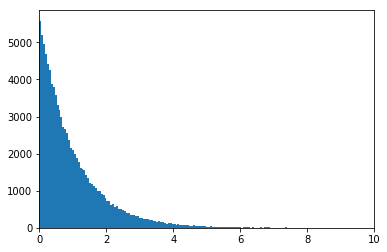

In [39]:
plt.hist(r1, bins = 200)
plt.xlim((0, 10))
plt.show()

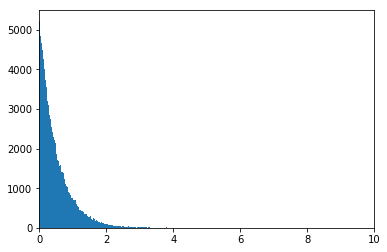

In [40]:
plt.hist(r2, bins = 200)
plt.xlim((0, 10))
plt.show()

#### Normal (Gaussian) Distribution

$$ f(x | \mu, \sigma ^{2} ) = \frac{1}{\sqrt{2\pi\sigma ^{2}}} e^{- \frac{(x - \mu )^{2}}{2 \sigma^{2}}} $$

The Gaussian distribution is described by two variables:
- mean $\mu$
- standard deviation $\sigma$

If $\mu=0$ and $\sigma=1$, the distribution is called standard normal distribution.

The Gaussian distribution approximates a lot of natural pheonomena.

It describes the variability in the data, where the forces behind them is additive.

Physical processes are expected to be the sum of many independant processes and often the have distributions nearly the normal distribution. 

In [41]:
g1 = np.random.normal(loc=0.0, scale=1.0, size=100000)
g2 = np.random.normal(loc=0.0, scale=3.0, size=100000)

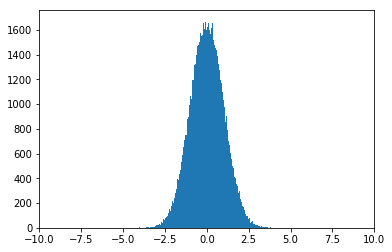

In [42]:
plt.hist(g1, bins = 200)
plt.xlim((-10, 10))
plt.show()

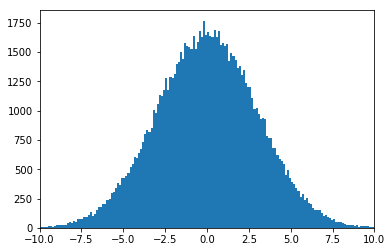

In [43]:
plt.hist(g2, bins = 200)
plt.xlim((-10, 10))
plt.show()

#### Lognormal Distribution

$$ f(x | \mu, \sigma ^{2} ) = \frac{1}{\sigma x \sqrt{2\pi}} e^{- \frac{(ln(x) - \mu )^{2}}{2 \sigma^{2}}} $$

where:
- $\mu$ is mean of the corresponding Gaussian distribution
- $\sigma$ is standard deviation of the corresponding Gaussian distribution

The lognormal distribution is similar to the Gaussian distribution.

The difference is that it is assumed that the processes behind the outcome are multiplicative, instead of additive as in the Gaussian distribution.

In [44]:
l1 = np.random.lognormal(mean=0.0, sigma=0.5, size=100000)
l2= np.random.lognormal(mean=0.0, sigma=1, size=100000)

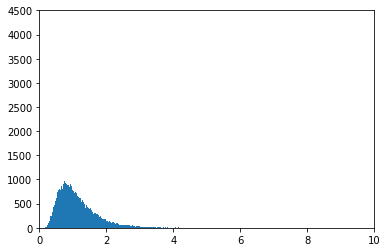

In [45]:
plt.hist(l1, bins = 1000)
plt.xlim((0, 10))
plt.ylim((0, 4500))
plt.show()

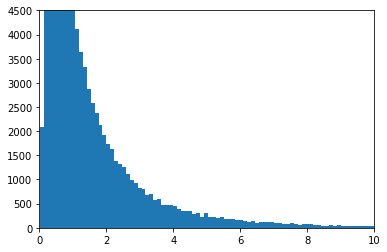

In [46]:
plt.hist(l2, bins = 1000)
plt.xlim((0, 10))
plt.ylim((0, 4500))
plt.show()

#### Pareto Distribution

The Pareto distribution originated from the economics as description of wealth ion the society.
If is often described using so called "Matthew principle": "rich get reacher, poor get poorer".

The probability density for the Pareto distribution is given as:
$$p(x) = \frac{am^a}{x^{a+1}}$$

where:
- a is the shape
- m is the scale

Pareto distribution given like that can be obtained:
```python
p = (np.random.pareto(a, size=1000) + 1) * m
```

In [47]:
p1 = (np.random.pareto(1, size=1000) + 1) * 1
p2 = (np.random.pareto(2, size=1000) + 1) * 1

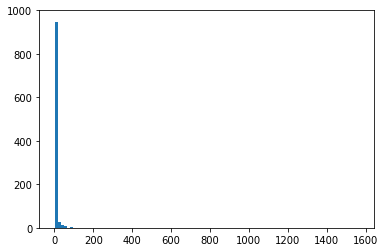

In [48]:
plt.hist(p1, bins=100)
plt.ylim((0, 1000))
plt.show()

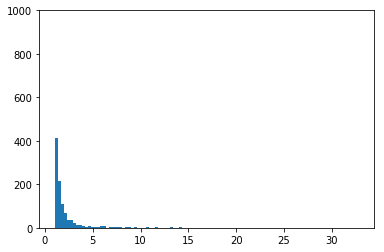

In [49]:
plt.hist(p2, bins = 100)
plt.ylim((0, 1000))
plt.show()

#### Weibull Distribution

The Weibull Distribution is given as:
$$ f(x ; \lambda, a) = \left\{\begin{matrix}
\frac{a}{\lambda}(\frac{x}{\lambda})^{a-1}e^{-(\frac{x}{\lambda})^{a}}
 & x \geq  0\\ 
 0 & x < 0
\end{matrix}\right. $$

where:
- a is the shape
- $\lambda$ is the scale

If the quantity X is a "time-to-failure", the Weibull distribution gives a distribution for which the failure rate is proportional to a power of time. 

The shape parameter, a, is that power plus one, and so this parameter can be interpreted directly as follows:

1) ** a < 1 ** - indicates that the failure rate decreases over time (Lindy effect). This happens if there is significant "infant mortality", or defective items failing early and the failure rate decreasing over time as the defective items are weeded out of the population. In the context of the diffusion of innovations, this means negative word of mouth: the hazard function is a monotonically decreasing function of the proportion of adopters.

2) ** a = 1 ** - indicates that the failure rate is constant over time. This might suggest random external events are causing mortality, or failure. The Weibull distribution reduces to an exponential distribution.

3) ** a > 1 ** - indicates that the failure rate increases with time. This happens if there is an "aging" process, or parts that are more likely to fail as time goes on. In the context of the diffusion of innovations, this means positive word of mouth: the hazard function is a monotonically increasing function of the proportion of adopters.

In [50]:
w1 = np.random.weibull(a=0.8, size=1000000)
w2 = np.random.weibull(a=1, size=1000000)
w3 = np.random.weibull(a=5, size=1000000)
w4 = np.random.weibull(a=10, size=1000000)

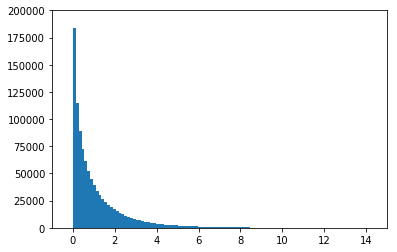

In [51]:
plt.hist(w1, bins = 200)
plt.xlim((-1, 15))
plt.ylim((0, 200000))
plt.show()

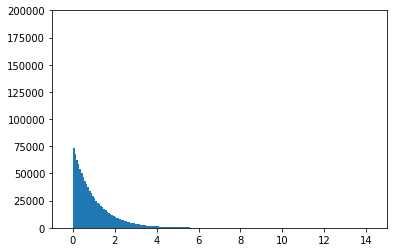

In [52]:
plt.hist(w2, bins = 200)
plt.xlim((-1, 15))
plt.ylim((0, 200000))
plt.show()

Different scale below:

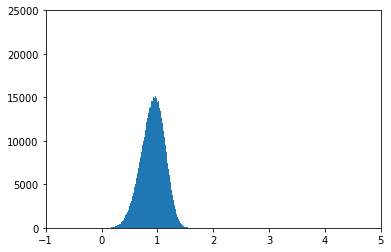

In [53]:
plt.hist(w3, bins = 200)
plt.xlim((-1, 5))
plt.ylim((0, 25000))
plt.show()

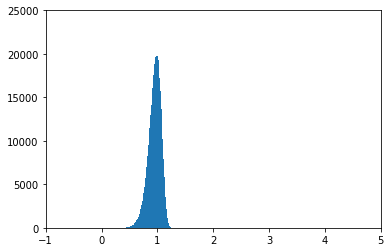

In [54]:
plt.hist(w4, bins = 200)
plt.xlim((-1, 5))
plt.ylim((0, 25000))
plt.show()

## Chapter 06

#### Moments

$k^{th}$ central moment is given as:
$$ m_{k} = \frac{1}{n}\sum_{i}^{ }(x_{i} - \bar{x})^{k} $$ 

Second order momentu, when $k = 2 $, is the variance.

If the measured value is in f.e. $cm$, the first moment is also in $cm$, but the second is in $cm^{2}$, the third in $cm^{3}$, the forth $cm^{4}$, and so on.

#### Skewness

Skewness is a property that describes the shape of a distribution.

- If the distribution is focused around its central tendency, it is unskewed.
- If the values focues on the left of the central tendency, it is described as "left skewed". 
- If the values focues on the right of the central tendency, it is called "right skewed".

#### Pearson's median skewness coefficient

Pearson's median skewness coefficient is a measure of skewness baed on the difference between the sample mean and median:
$$ g_{p}=3 \frac{(\bar x - \tilde{x})}{\sigma} $$

where: 
- $ \tilde{x} $ is the median
- $ \sigma $ is the standard deviation

#### Robustness of a statistic

A statistic is robust if the outliers have relatively small impact on the value of the statistic.

## Chapter 07

#### Correlation

A correlation is a statistic intended to quantify the strength of the relationship between two variables. 

Few challenges present themselves during such analysis:
- usually the variables have different units
- usually the variables come from different distributions

There are two common approaches trying to solve the challenges:
- Transforming each value to a standard score (example: Pearson product-moment correlation coefficient)
- Transforming each value to a rank (example: Spearman rank correlation coefficient)

#### Covariance

Covariance is a measurement of the tendency of two variables to vary together.

It is given as:

$$ Cov(X, Y) = \frac{1}{n-1}\sum (x_{i} - \bar x)(y_{i} - \bar y) $$

where:
- X and Y are two series of the same lengths

In [55]:
Z = np.array([[0, 2], [1, 1], [2, 0]]).T

In [56]:
Z

array([[0, 1, 2],
       [2, 1, 0]])

In [57]:
np.cov(Z, ddof=1)

array([[ 1., -1.],
       [-1.,  1.]])

#### Pearson's Correlation

The Pearson's correlation is computed by dividing the deviations by the standard deviations:

$$p = \frac{Conv(X, Y)}{\sigma_{X} \sigma_{Y}}$$

Pearson's correlations ia always between -1 and +1. 
If the value $p$ is positive, the correlated values change is similar manner, when one is high, the other one tends to be high as well, when one is low, the other one tends to be low. 
If the value $p$ is positive, the correlated values change is similar manner, when one is high, the other one tends to be high as well, when one is low, the other one tends to be low. 

The magnitude of the correlation, $p$, describes the strength of the correlation when 1 is the perfect, positive correlation.

Pearson's correlation works

#### Spearman's Rank

Spearman's rank is more robust than the Pearson's correlations. It mitgates the effect of outliers and skewed distributions.

If the relationship is nonlinear, the Pearson'c correlation tends to underestimate the strength of the relationship.

In [58]:
stats.spearmanr([1, 2, 3, 4, 5], [5, 6, 7, 8, 7])

SpearmanrResult(correlation=0.8207826816681233, pvalue=0.08858700531354381)

## Chapter 08

#### Mean Squared Error

Mean squared error is a way to measure a quality of an estimator.
It is important to mention that it is very sensitive to outliers and large values.

$$ MSE = \frac{1}{n}\sum (Y_{i}-\hat{Y_{i}})^{2} $$

In [59]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)

0.375

## Chapter 09

#### T-test

A t-test is an analysis framework used to determine the difference between two sample means from two normally distributed populations with unknown variances.

#### Chi-Squared Test

Definition:

https://www.chegg.com/homework-help/definitions/chi-square-test-14

Example of chi-squared test methodology.

https://www.spss-tutorials.com/chi-square-independence-test/

#### Holm–Bonferroni method

Holm-Bonferroni method is used to counteract the problem of multiple comparisons.

#### Errors

In hypothesis testing, there are two types of error one can make:
- false positive - assuming that something is significant, when, in reality, it is not.
- false negative - assuming that something is not significant when it is.

## Chapter 10

#### Least Squares Fit

Least square fit is given as:
$$ y = ax + b $$ 
where:
- a - slope 
- b - inter

It is a good approach to estimate an unknown value or correlation between values if the relation is linear.

#### Coefficient of determination

Another way to measure goodness of fit is the coefficient of determination, known as $R^2$ and called R-squared:

There is a relationship between the Pearson's coefficient of correlation:
$$ R^2 = p^2 $$
Thus, if Pearson's correlation is 0.5 or -0.5, then the R-squared is 0.25.

## Chapter 11

#### Logistic Regression

Linear regression can be generalized to handle various kind of dependent variables.

#### Types of variables

Endogenous variables are dependent variables, they are kind of variables one would like to predict.

Exogenous variables are explanatory variables, which are variables used to predict or explain dependent variables.

## Chapter 12

#### Vocabulary

- trend = a smooth function that captures persistent changes
- seasonality = periodic variation (possibly daily, weekly, monghtly, yearly cycles)
- noise = random variations around a longterm trend

#### Moving average

One way to simply measure seasonality is moving average.
It is computed by calculating mean over a certain window and move the window, usually by the smallest period.

In [60]:
trend = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])
noise = pd.Series(np.random.random(11))
season = trend + noise
season.name = 'season'

In [61]:
two_day_window = season.rolling(window=2).mean()
two_day_window.name = 'rolling mean'

In [62]:
two_day_window

0          NaN
1     1.909154
2     3.096410
3     4.153999
4     5.112695
5     6.073532
6     5.988762
7     5.104715
8     4.263323
9     3.359819
10    1.977519
Name: rolling mean, dtype: float64

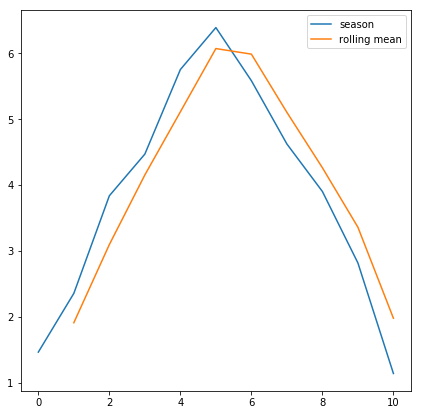

In [63]:
plt.figure(figsize=(7, 7))
plt.plot(season)
plt.plot(two_day_window)
plt.legend()

#### Exponentially-weighted moving average (EWMA)

Another approach is to calculate weighted average where the most recent values has the highest weight and the weights from previous values drop off exponentially.

The span parameter roughly corresponds to the window size of a moving average. It controls how fast the weights drop off, so it determines the number of points that make a non-negligible contribution to each average.

In [64]:
ewma2 = season.ewm(span=2).mean()
ewma2.name = 'ewma2'
ewma3 = season.ewm(span=3).mean()
ewma3.name = 'ewma3'
ewma5 = season.ewm(span=5).mean()
ewma5.name = 'ewma5'

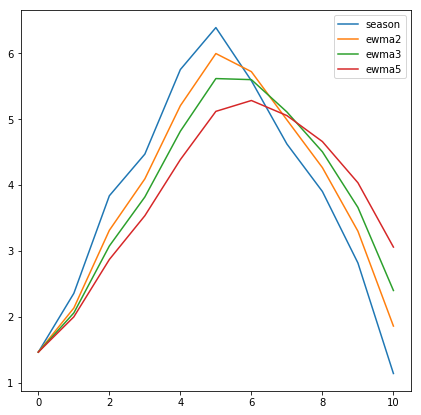

In [65]:
plt.figure(figsize=(7, 7))
plt.plot(season)
plt.plot(ewma2)
plt.plot(ewma3)
plt.plot(ewma5)
plt.legend()

#### Types of errors in series prediction

- sampling error = the prediction is based on estimated parameters, which depend on random variation in the sample. If we run the experiment again, we expect estimates to vary
- random variation = unexpected random event / variation 
- modeling error = inadequate, over engineered or simply wrong models